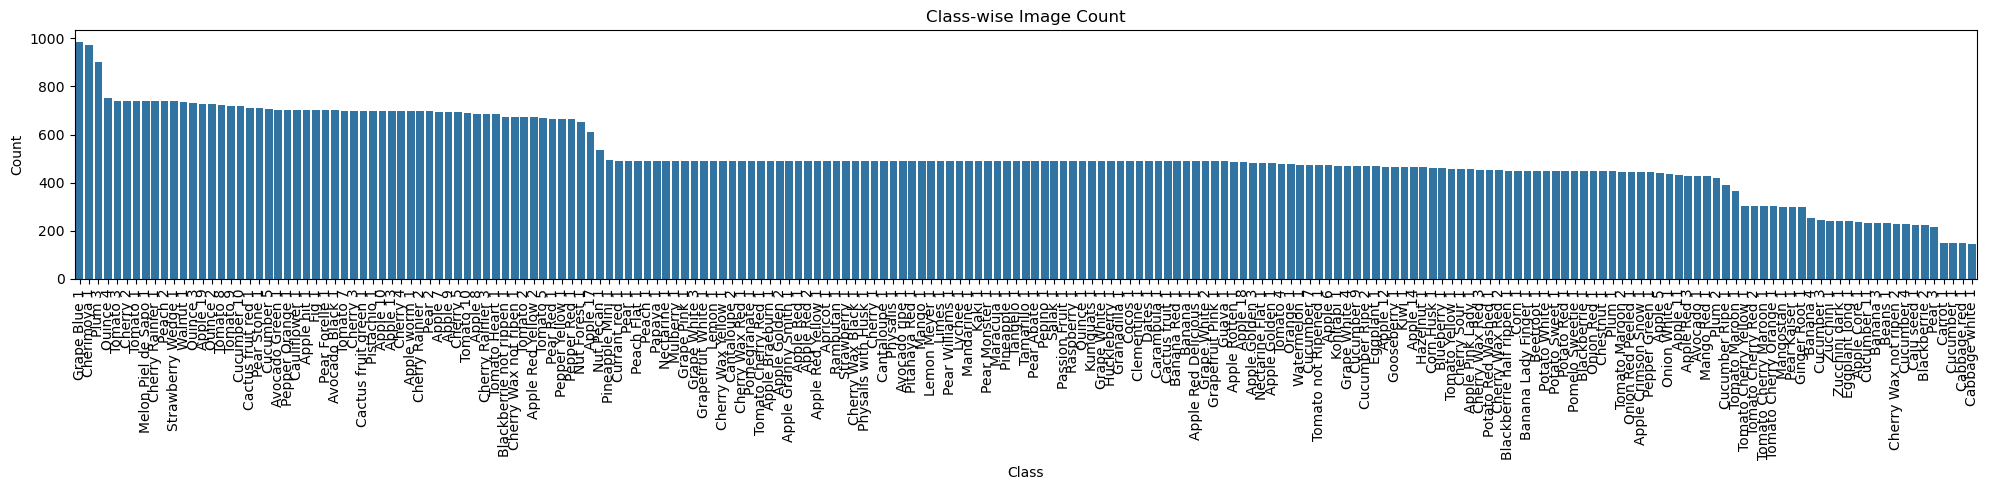

In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
from collections import defaultdict
import numpy as np

target_dir = "/Users/wecky/Documents/Uchi/Machine_Learning_2/Final/data/fruits-360-100x100-main/Training"
# target_dir = "/Users/wecky/Documents/Uchi/Machine_Learning_2/Final/data/TrainingNew"

valid_exts = {'.jpg', '.jpeg', '.png', '.bmp'}

class_counts = {}
class_examples = defaultdict(list)
image_shapes = []

for cls_name in sorted(os.listdir(target_dir)):
    cls_path = os.path.join(target_dir, cls_name)
    if not os.path.isdir(cls_path):
        continue
    files = [f for f in os.listdir(cls_path) if os.path.splitext(f)[-1].lower() in valid_exts]
    class_counts[cls_name] = len(files)
    
    for fname in files[:3]:  # display
        fpath = os.path.join(cls_path, fname)
        try:
            img = Image.open(fpath)
            image_shapes.append(img.size)
            class_examples[cls_name].append(img.copy())
        except:
            print(f"❌ Cannot open {fpath}")

df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(x="Class", y="Count", data=df_counts)
plt.xticks(rotation=90)
plt.title("Class-wise Image Count")
plt.tight_layout()
plt.show()




 origianl classes count: 201
total photos count: 102790

grouped classes count: 142
      Cleaned_Class  Count
0             Apple   7571
129          Tomato   6129
38           Cherry   3321
50         Cucumber   3226
121          Quince   2699
39   Cherry Rainier   2120
62      Grape White   1943
114            Plum   1767
4      Apple Golden   1453
7         Apple Red   1413


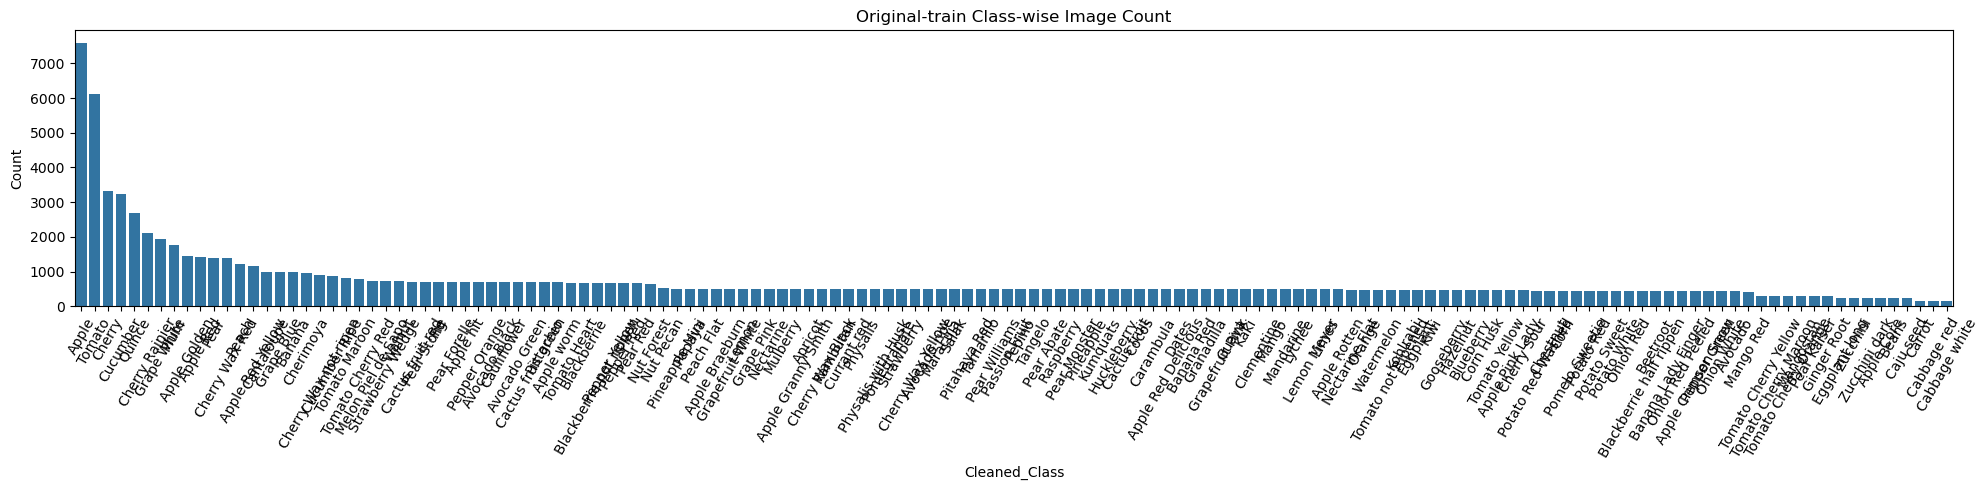

In [18]:
print(f"\n origianl classes count: {len(df_counts)}")
print(f"total photos count: {df_counts['Count'].sum()}\n")

import re
df_counts["Cleaned_Class"] = df_counts["Class"].apply(lambda x: re.sub(r'[\s_()-]*\d+$', '', x.strip()))

df_merged = df_counts.groupby("Cleaned_Class", as_index=False)["Count"].sum().sort_values("Count", ascending=False)

print(f"grouped classes count: {len(df_merged)}")
print(df_merged.head(10)) 

plt.figure(figsize=(20, 5))
sns.barplot(x="Cleaned_Class", y="Count", data=df_merged)
plt.xticks(rotation=60)
plt.title("Original-train Class-wise Image Count")
plt.tight_layout()
plt.show()

In [19]:
df_shapes = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print("Image Shape Summary:")
print(df_shapes.describe())


Image Shape Summary:
       Width  Height
count  603.0   603.0
mean   100.0   100.0
std      0.0     0.0
min    100.0   100.0
25%    100.0   100.0
50%    100.0   100.0
75%    100.0   100.0
max    100.0   100.0


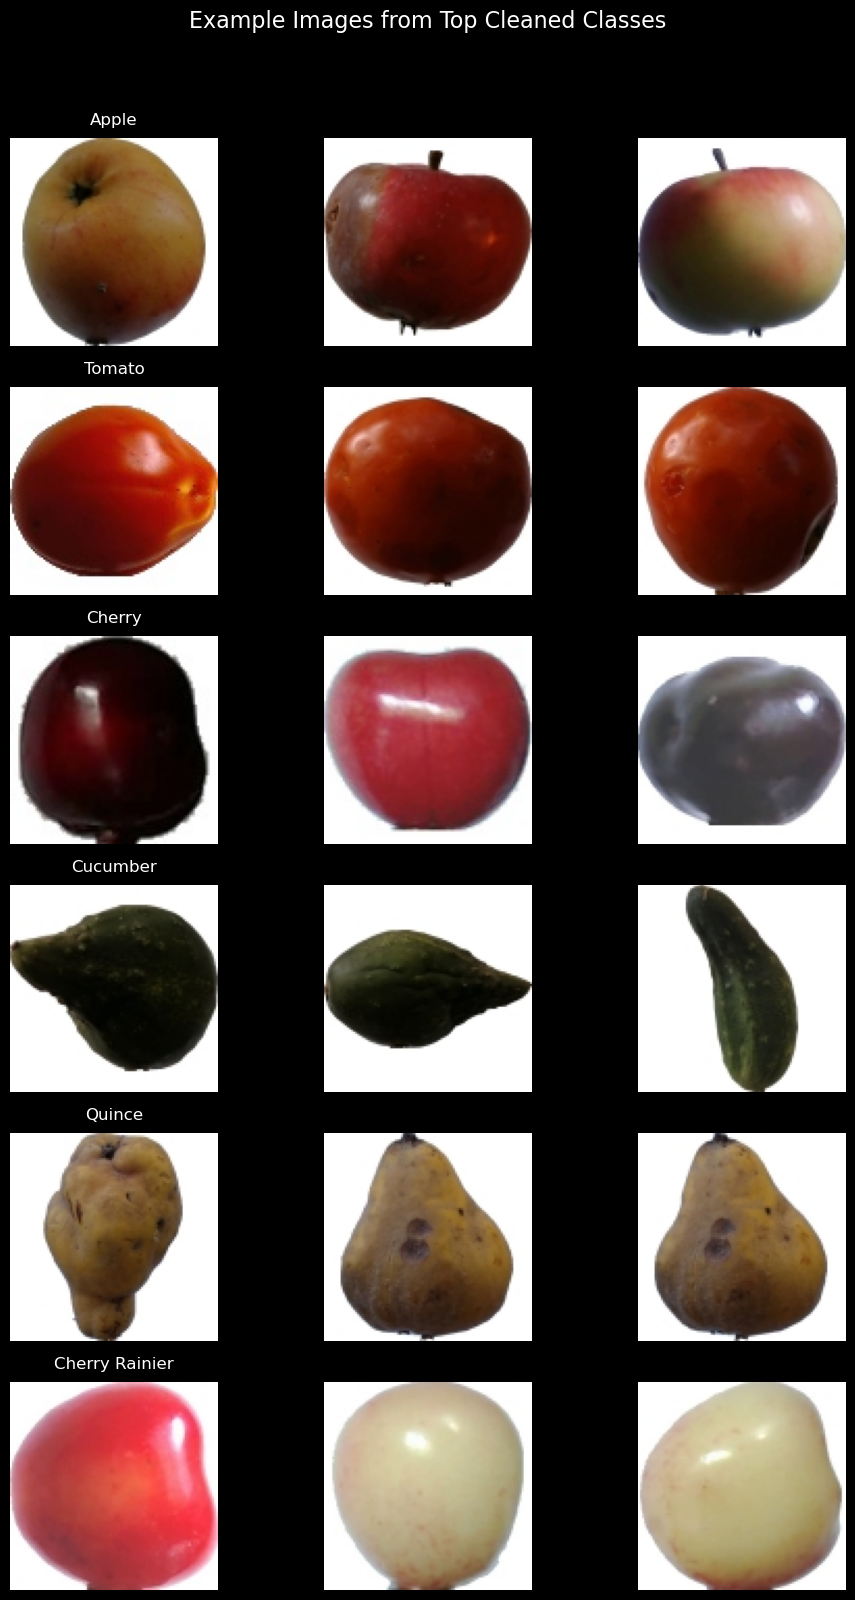

In [20]:
from random import sample

top_k_classes = 6 
examples_per_class = 3

top_classes = df_merged.head(top_k_classes)["Cleaned_Class"].tolist()

cleaned_to_original = defaultdict(list)
for orig, cleaned in zip(df_counts["Class"], df_counts["Cleaned_Class"]):
    cleaned_to_original[cleaned].append(orig)
fig, axes = plt.subplots(top_k_classes, examples_per_class, figsize=(10, 2.8 * top_k_classes))
fig.patch.set_facecolor("black") 

for i, clean_name in enumerate(top_classes):
    collected_paths = []
    for orig_name in cleaned_to_original[clean_name]:
        orig_dir = os.path.join(target_dir, orig_name)
        if os.path.isdir(orig_dir):
            for fname in os.listdir(orig_dir):
                if os.path.splitext(fname)[-1].lower() in valid_exts:
                    collected_paths.append(os.path.join(orig_dir, fname))

    chosen_paths = sample(collected_paths, min(examples_per_class, len(collected_paths)))

    for j in range(examples_per_class):
        ax = axes[i][j] if top_k_classes > 1 else axes[j]
        ax.axis("off")
        ax.set_facecolor("black")
        if j < len(chosen_paths):
            try:
                img = Image.open(chosen_paths[j])
                ax.imshow(img)
            except:
                pass
        if j == 0:
            ax.set_title(clean_name, fontsize=12, color="white", pad=10)

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.suptitle("Example Images from Top Cleaned Classes", fontsize=16, color="white")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

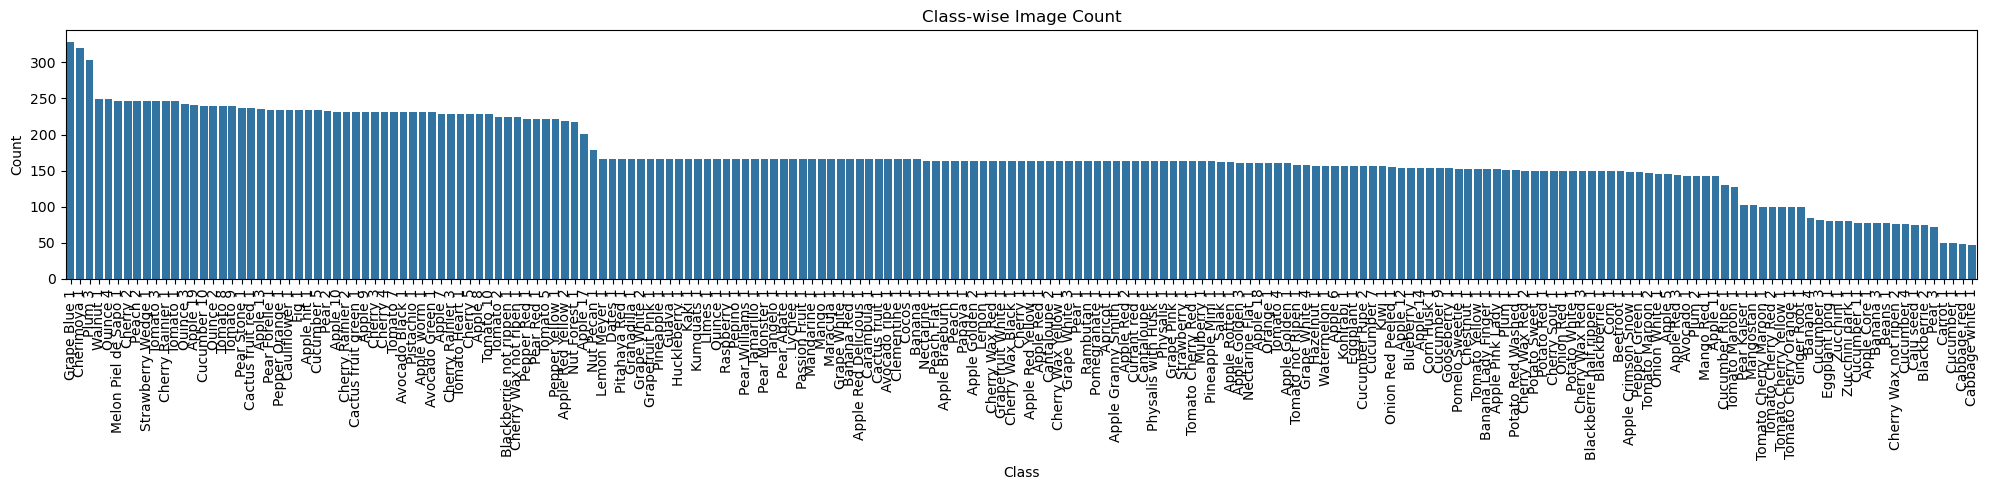

In [21]:
target_dir = "/Users/wecky/Documents/Uchi/Machine_Learning_2/Final/data/fruits-360-100x100-main/Test"
valid_exts = {'.jpg', '.jpeg', '.png', '.bmp'}

class_counts = {}
class_examples = defaultdict(list)
image_shapes = []

for cls_name in sorted(os.listdir(target_dir)):
    cls_path = os.path.join(target_dir, cls_name)
    if not os.path.isdir(cls_path):
        continue
    files = [f for f in os.listdir(cls_path) if os.path.splitext(f)[-1].lower() in valid_exts]
    class_counts[cls_name] = len(files)
    
    for fname in files[:3]: 
        fpath = os.path.join(cls_path, fname)
        try:
            img = Image.open(fpath)
            image_shapes.append(img.size)
            class_examples[cls_name].append(img.copy())
        except:
            print(f"❌ Cannot open {fpath}")

df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(x="Class", y="Count", data=df_counts)
plt.xticks(rotation=90)
plt.title("Class-wise Image Count")
plt.tight_layout()
plt.show()



 origianl classes count: 201
total photos count: 34314

grouped classes count: 142
      Cleaned_Class  Count
0             Apple   2509
129          Tomato   2036
38           Cherry   1100
50         Cucumber   1069
121          Quince    897
39   Cherry Rainier    705
62      Grape White    654
114            Plum    597
4      Apple Golden    485
7         Apple Red    472


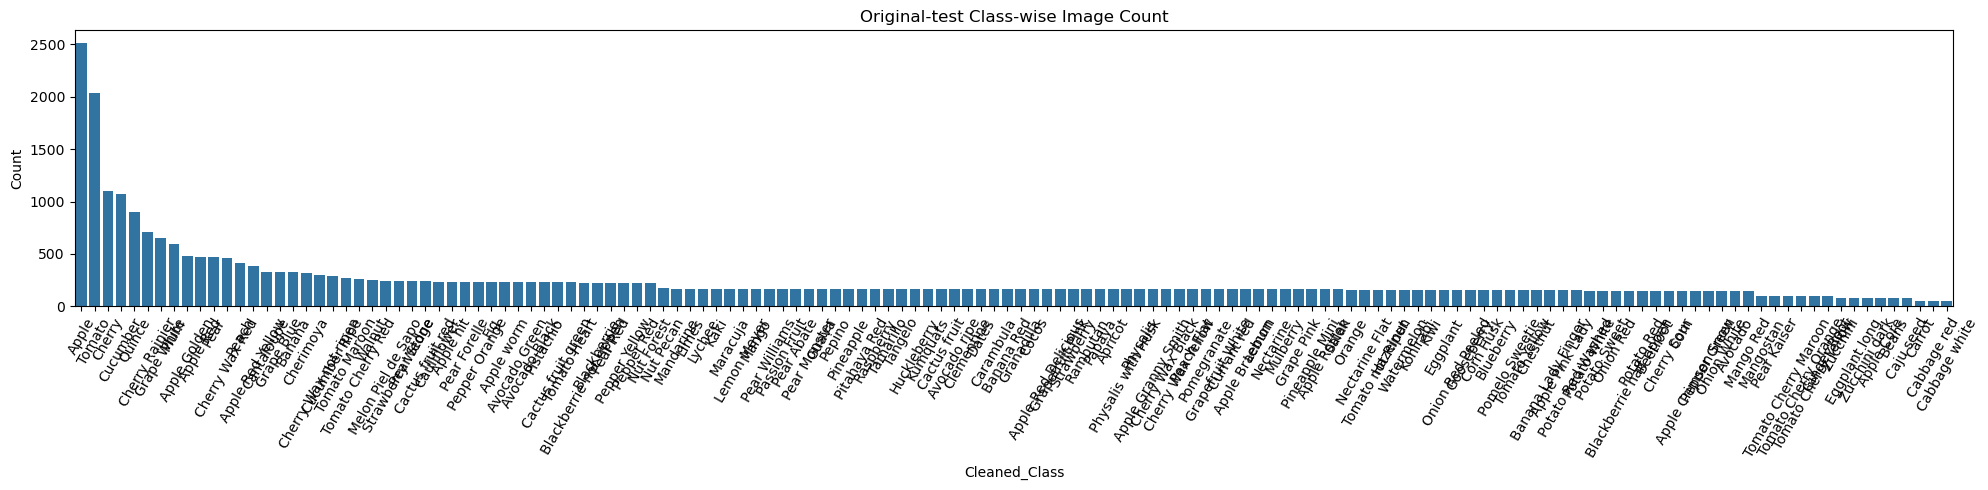

In [22]:
print(f"\n origianl classes count: {len(df_counts)}")
print(f"total photos count: {df_counts['Count'].sum()}\n")

import re
df_counts["Cleaned_Class"] = df_counts["Class"].apply(lambda x: re.sub(r'[\s_()-]*\d+$', '', x.strip()))

df_merged = df_counts.groupby("Cleaned_Class", as_index=False)["Count"].sum().sort_values("Count", ascending=False)

print(f"grouped classes count: {len(df_merged)}")
print(df_merged.head(10))  

plt.figure(figsize=(20, 5))
sns.barplot(x="Cleaned_Class", y="Count", data=df_merged)
plt.xticks(rotation=60)
plt.title("Original-test Class-wise Image Count")
plt.tight_layout()
plt.show()

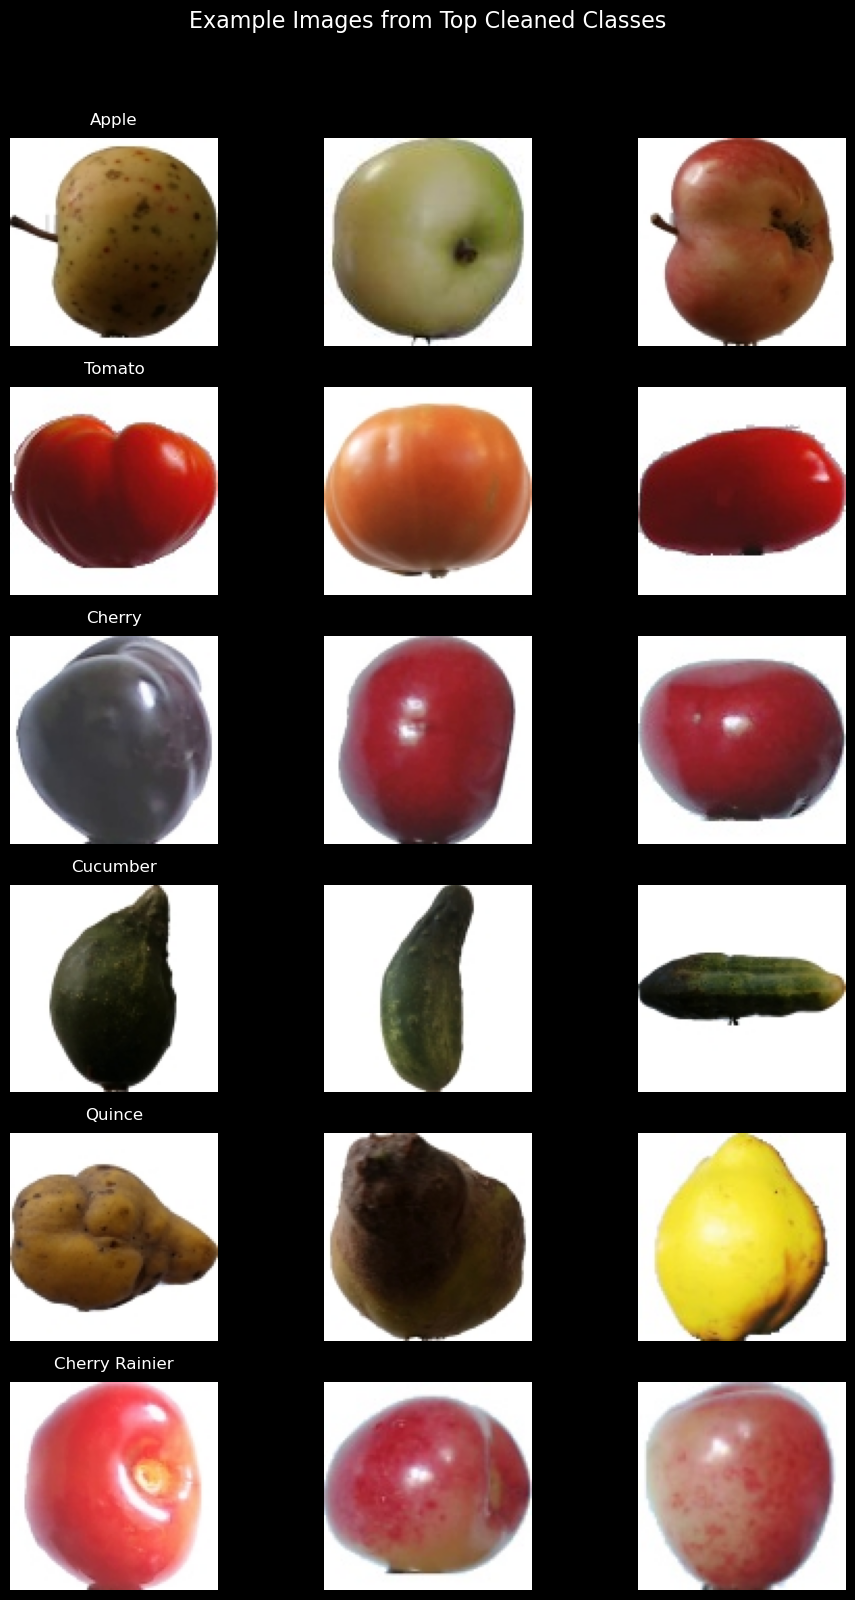

In [23]:
from random import sample

top_k_classes = 6  
examples_per_class = 3

top_classes = df_merged.head(top_k_classes)["Cleaned_Class"].tolist()

cleaned_to_original = defaultdict(list)
for orig, cleaned in zip(df_counts["Class"], df_counts["Cleaned_Class"]):
    cleaned_to_original[cleaned].append(orig)
fig, axes = plt.subplots(top_k_classes, examples_per_class, figsize=(10, 2.8 * top_k_classes))
fig.patch.set_facecolor("black")  

for i, clean_name in enumerate(top_classes):
    collected_paths = []
    for orig_name in cleaned_to_original[clean_name]:
        orig_dir = os.path.join(target_dir, orig_name)
        if os.path.isdir(orig_dir):
            for fname in os.listdir(orig_dir):
                if os.path.splitext(fname)[-1].lower() in valid_exts:
                    collected_paths.append(os.path.join(orig_dir, fname))

    chosen_paths = sample(collected_paths, min(examples_per_class, len(collected_paths)))

    for j in range(examples_per_class):
        ax = axes[i][j] if top_k_classes > 1 else axes[j]
        ax.axis("off")
        ax.set_facecolor("black") 
        if j < len(chosen_paths):
            try:
                img = Image.open(chosen_paths[j])
                ax.imshow(img)
            except:
                pass
        if j == 0:
            ax.set_title(clean_name, fontsize=12, color="white", pad=10)

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.suptitle("Example Images from Top Cleaned Classes", fontsize=16, color="white")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

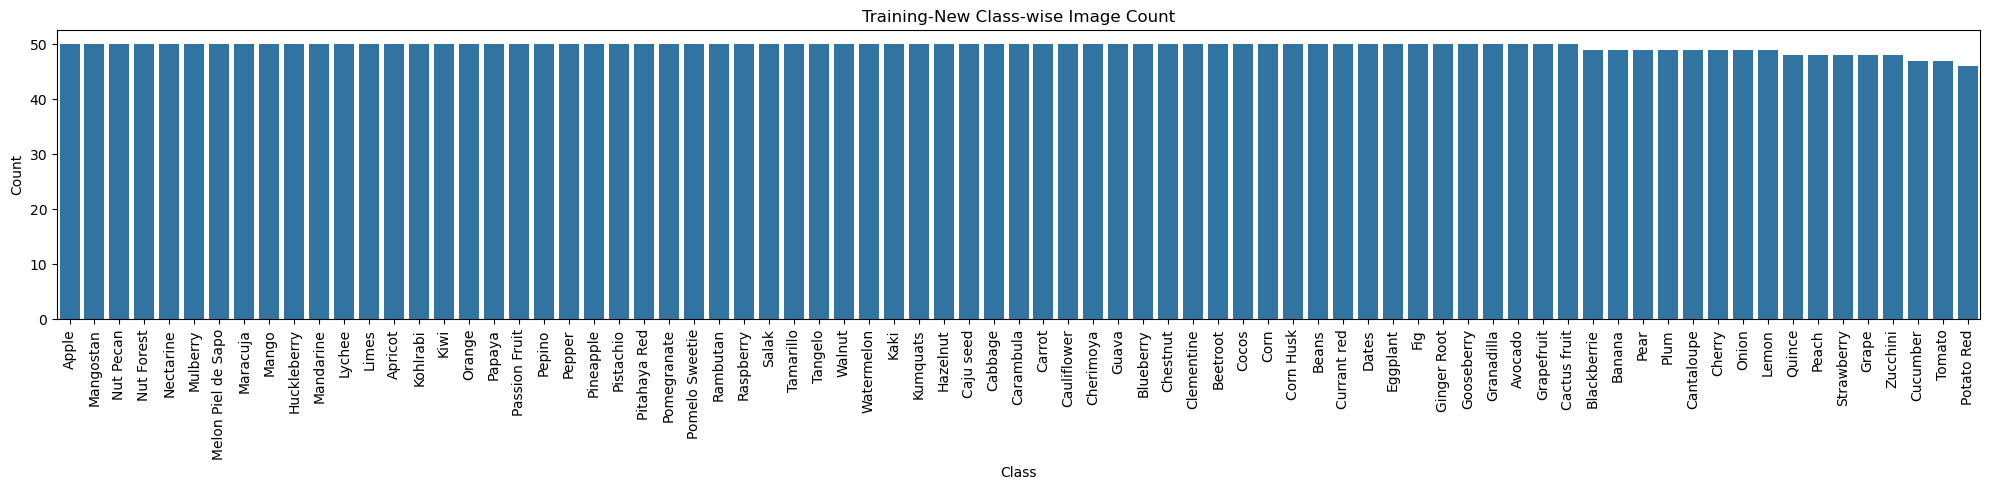

In [24]:
target_dir = "/Users/wecky/Documents/Uchi/Machine_Learning_2/Final/data/training-new"
valid_exts = {'.jpg', '.jpeg', '.png', '.bmp'}

class_counts = {}
class_examples = defaultdict(list)
image_shapes = []

for cls_name in sorted(os.listdir(target_dir)):
    cls_path = os.path.join(target_dir, cls_name)
    if not os.path.isdir(cls_path):
        continue
    files = [f for f in os.listdir(cls_path) if os.path.splitext(f)[-1].lower() in valid_exts]
    class_counts[cls_name] = len(files)
    
    for fname in files[:3]: 
        fpath = os.path.join(cls_path, fname)
        try:
            img = Image.open(fpath)
            image_shapes.append(img.size)
            class_examples[cls_name].append(img.copy())
        except:
            print(f"❌ Cannot open {fpath}")

df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(x="Class", y="Count", data=df_counts)
plt.xticks(rotation=90)
plt.title("Training-New Class-wise Image Count")
plt.tight_layout()
plt.show()


In [25]:
print(f"\nclasses count: {len(df_counts)}")
print(f"pictures count: {df_counts['Count'].sum()}\n")


classes count: 77
pictures count: 3822



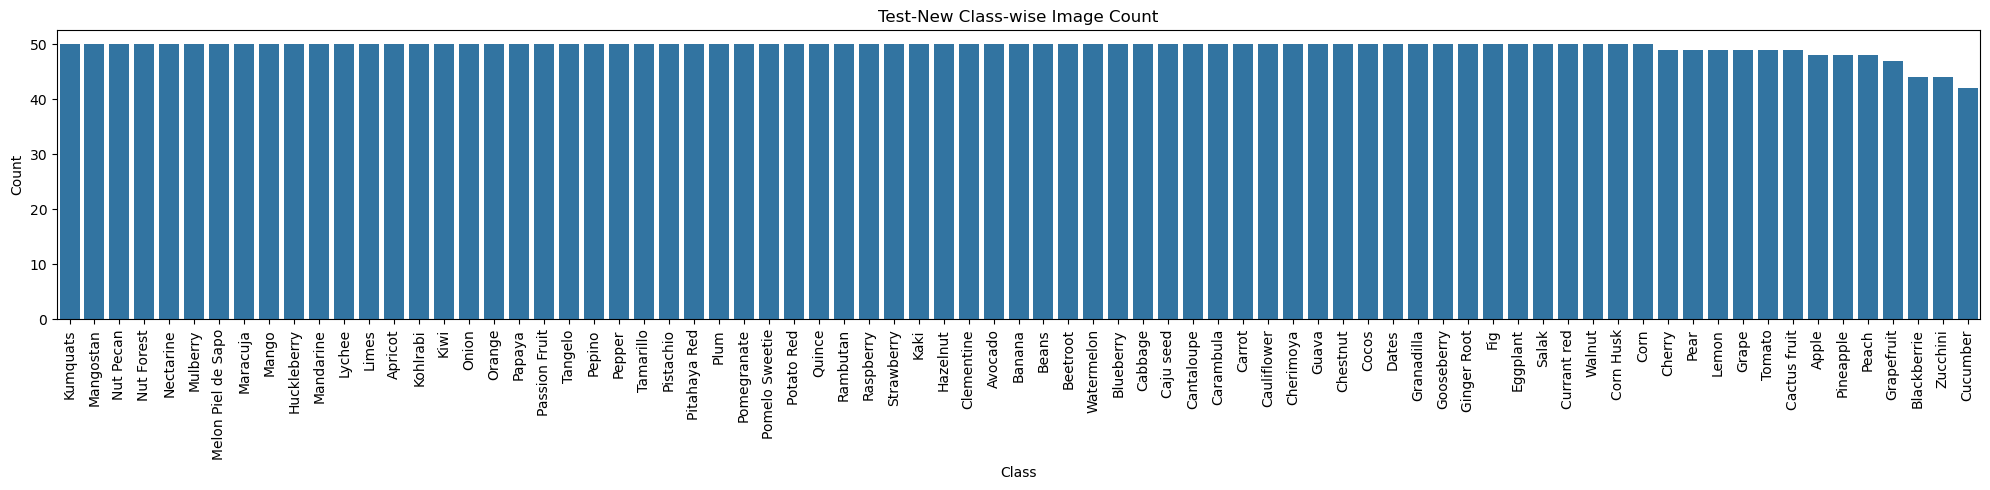

In [26]:
target_dir = "/Users/wecky/Documents/Uchi/Machine_Learning_2/Final/data/testing-new"
valid_exts = {'.jpg', '.jpeg', '.png', '.bmp'}

class_counts = {}
class_examples = defaultdict(list)
image_shapes = []

for cls_name in sorted(os.listdir(target_dir)):
    cls_path = os.path.join(target_dir, cls_name)
    if not os.path.isdir(cls_path):
        continue
    files = [f for f in os.listdir(cls_path) if os.path.splitext(f)[-1].lower() in valid_exts]
    class_counts[cls_name] = len(files)
    
    for fname in files[:3]:
        fpath = os.path.join(cls_path, fname)
        try:
            img = Image.open(fpath)
            image_shapes.append(img.size)
            class_examples[cls_name].append(img.copy())
        except:
            print(f"❌ Cannot open {fpath}")

df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(x="Class", y="Count", data=df_counts)
plt.xticks(rotation=90)
plt.title("Test-New Class-wise Image Count")
plt.tight_layout()
plt.show()


In [27]:
print(f"\nclasses count: {len(df_counts)}")
print(f"photos count: {df_counts['Count'].sum()}\n")


classes count: 77
photos count: 3815



In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

datagen = ImageDataGenerator(rescale=1./255)

train_path = "/Users/wecky/Documents/Uchi/Machine_Learning_2/Final/data/training-new"

generator = datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=1,
    class_mode='categorical'
)

print(generator.class_indices)

Found 3822 images belonging to 77 classes.
{'Apple': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Beans': 4, 'Beetroot': 5, 'Blackberrie': 6, 'Blueberry': 7, 'Cabbage': 8, 'Cactus fruit': 9, 'Caju seed': 10, 'Cantaloupe': 11, 'Carambula': 12, 'Carrot': 13, 'Cauliflower': 14, 'Cherimoya': 15, 'Cherry': 16, 'Chestnut': 17, 'Clementine': 18, 'Cocos': 19, 'Corn': 20, 'Corn Husk': 21, 'Cucumber': 22, 'Currant red': 23, 'Dates': 24, 'Eggplant': 25, 'Fig': 26, 'Ginger Root': 27, 'Gooseberry': 28, 'Granadilla': 29, 'Grape': 30, 'Grapefruit': 31, 'Guava': 32, 'Hazelnut': 33, 'Huckleberry': 34, 'Kaki': 35, 'Kiwi': 36, 'Kohlrabi': 37, 'Kumquats': 38, 'Lemon': 39, 'Limes': 40, 'Lychee': 41, 'Mandarine': 42, 'Mango': 43, 'Mangostan': 44, 'Maracuja': 45, 'Melon Piel de Sapo': 46, 'Mulberry': 47, 'Nectarine': 48, 'Nut Forest': 49, 'Nut Pecan': 50, 'Onion': 51, 'Orange': 52, 'Papaya': 53, 'Passion Fruit': 54, 'Peach': 55, 'Pear': 56, 'Pepino': 57, 'Pepper': 58, 'Pineapple': 59, 'Pistachio': 60, 'Pitah

In [29]:
import json

with open("class_labels.json", "w") as f:
    json.dump(generator.class_indices, f)